In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!ls '/content/drive/My Drive/BSEF19M009_THQ3/'

animals  Three_Animals_Classified_model.h5


In [12]:
modelPath = '/content/drive/My Drive/BSEF19M009_THQ3/'

In [13]:
from tensorflow import keras


model = keras.models.load_model(modelPath+'Three_Animals_Classified_model.h5')

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
name_mapping_dict = {'Cat': 0,
                     'Dog': 1,
                     'Panda': 2}


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'Cat', 1: 'Dog', 2: 'Panda'}


In [16]:
img_size = 192

In [17]:
def test_func(model, img_size, img_name, class_name_mapping):
  img = plt.imread(img_name)
  img = cv2.resize(img, (img_size, img_size))

  temp_img = np.expand_dims(img, axis=0)
  
  prediction = class_name_mapping[np.argmax(model.predict(temp_img)[0])]
  print("Model prediction: {}".format(prediction))
  
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

Model prediction: Cat


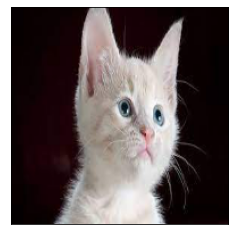

In [37]:
test_func(model, img_size=192, img_name='cat.jpg', class_name_mapping=inv_name_mapping_dict)

Model prediction: Panda


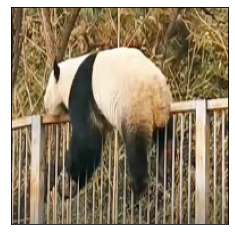

In [36]:
test_func(model, img_size=192, img_name='panda.jpg', class_name_mapping=inv_name_mapping_dict)

Model prediction: Panda


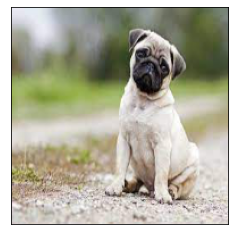

In [38]:
test_func(model, img_size=192, img_name='dog.jpg', class_name_mapping=inv_name_mapping_dict)